In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('melb_data.csv')

In [4]:
df.head() 

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN        Yarra  -37.7996    144.9984  Northern Metropolitan   
1     1900.0        Yarra  -37.8079    144.9934  Northern Metropolitan   
2     1900.0        Yarra  -37.8093    144.9944  Northern Metropolitan   
3        NaN        Yarra  -37.7969    144.9969  Northern Metropolitan   
4     2014.0        Yarra  -37.8072    144.9941  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

In [5]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [7]:
df = df.dropna()

In [8]:
import plotly.express as px
fig = px.density_mapbox(df, lat='Lattitude', lon='Longtitude', z='Price', radius=10, center=dict(lat=-37.8, lon=145), zoom=9, mapbox_style="stamen-terrain", opacity = 0.5, title = 'Melbourne Price Heatmap')
fig.show()

<AxesSubplot:xlabel='Price', ylabel='Bedroom2'>

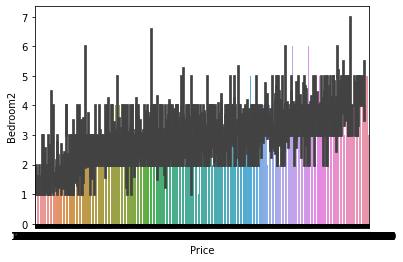

In [9]:
sns.barplot(x='Price', y='Bedroom2', data=df)

<AxesSubplot:xlabel='Price', ylabel='BuildingArea'>

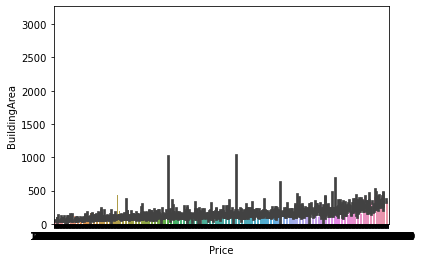

In [10]:
sns.barplot(x='Price', y='BuildingArea', data=df)

<AxesSubplot:>

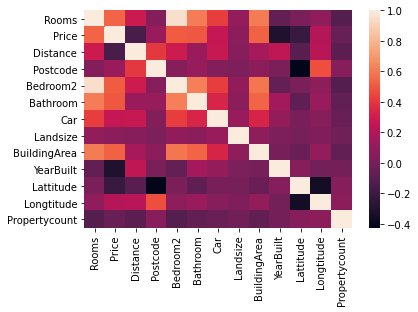

In [11]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Price', ylabel='Car'>

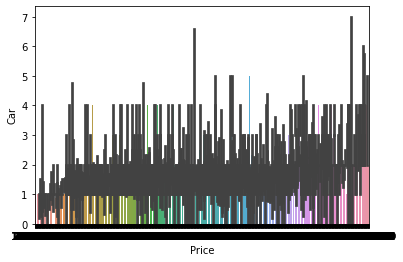

In [12]:
sns.barplot(x='Price', y='Car', data=df)

<p>O gráfico ficou prejudicado por um outliner, vou tirá-lo.</p>

In [13]:
df[df['BuildingArea'] == 3112]

Suburb          Address  Rooms Type      Price Method   SellerG  \
1588  Camberwell  46 Athelstan Rd      5    h  2608000.0      S  Marshall   

            Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
1588  15/10/2016       7.8    3124.0  ...       2.0  4.0     730.0   

      BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude  \
1588        3112.0     1920.0   Boroondara  -37.8424    145.0639   

                 Regionname Propertycount  
1588  Southern Metropolitan        8920.0  

[1 rows x 21 columns]

In [14]:
df['BuildingArea'].mean()

141.56864454486765

In [15]:
df['BuildingArea'].max()

3112.0

In [16]:
df['BuildingArea'].sort_values() # tem um valor muuuuuuuuuuuito outliers

4344        0.0
11902       1.0
11578       1.0
11931       1.0
11883       1.0
          ...  
12064     934.0
3640     1022.0
1368     1041.0
2234     1561.0
1588     3112.0
Name: BuildingArea, Length: 6196, dtype: float64

<AxesSubplot:xlabel='Price', ylabel='Car'>

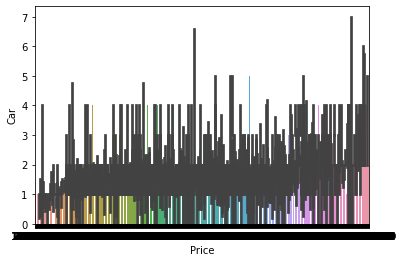

In [17]:
sns.barplot(x='Price', y='Car', data=df)

<p>Note que existe uma certa relação entre as variáveis <strong>preço</strong> com <strong>área construída</strong> e <strong>preço</strong> com <strong>número de quartos</strong>.</p>

<h1>Quais são as variáveis interessantes neste DataSet?</h1>
<ul>
    <li><strong>Rooms:</strong> número de quartos.</li>
    <li><strong>Bedromm2:</strong> Número de quartos (?)</li>
    <li><strong>Bathroom:</strong> Número de Banheiros.</li>
    <li><strong>Price: </strong>preço em dólar.</li>
    <li><strong>Car:</strong>Número de vagas de carro.</li>
    <li><strong>Landsize:</strong> Área do terreno.</li>
    <li><strong>BuildingArea:</strong>Área construída.</li>
    <li><strong>YearBuilt:</strong>Ano de construção.</li>
</ul>
<p><strong>Method</strong> parece seu uma variável interessante de se trabalhar, ela diz respeito a forma que a casa foi vendida. Pode ter sido uma venda normal ou até um leilão. Veremos como poderemos utilizar e se utilizaremos ela no decorrer do trabalho.</p>

<h2>Vamos fazer uma análise exploratória dos dados para compreender melhor o dataset</h2>

<AxesSubplot:xlabel='Rooms', ylabel='Count'>

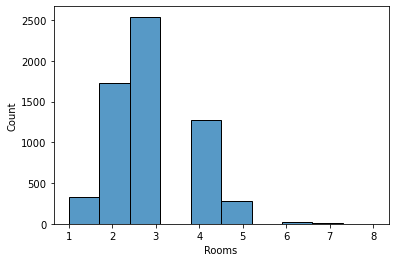

In [18]:
sns.histplot(df['Rooms'], bins=10) # Mais ou menos 2-3 quartos.

In [19]:
df['Rooms'].mean()

2.93140735958683

<strong>O número médio de quartos por casa é de 2.9.</strong>

<AxesSubplot:xlabel='Bathroom', ylabel='Count'>

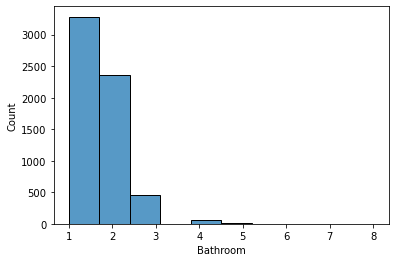

In [20]:
sns.histplot(df['Bathroom'], bins=10) # Mais ou menos de 1 a 2 banheiros.

In [21]:
df['Bathroom'].mean()

1.5763395739186572

In [22]:
df[df['Price'] == df['Price'].min()]

Suburb     Address  Rooms Type     Price Method SellerG        Date  \
1805  Caulfield  30 Pyne St      4    h  131000.0     PI  Rodney  25/02/2017   

      Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
1805       8.9    3162.0  ...       1.0  2.0     499.0         155.0   

      YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
1805     1920.0    Glen Eira  -37.8864    145.0242  Southern Metropolitan   

     Propertycount  
1805        2379.0  

[1 rows x 21 columns]

<strong>O número médio de banheiros por casa é de 1.57.</strong>

<AxesSubplot:xlabel='Car', ylabel='Count'>

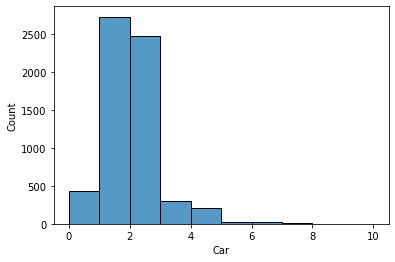

In [23]:
sns.histplot(df['Car'], bins=10) # Mais ou menos 1-2 carros na vaga em média.

In [24]:

df['Price'].mean()

1068828.202065849

<strong>O número médio de vagas para carro no dataset é de 1.57.</strong>

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

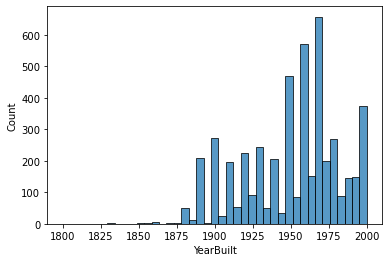

In [25]:
sns.histplot(df['YearBuilt'], binrange=(1800, 2000)) #Distribuição do ano de construção das casas

<p>Interessante notar que existem anos com um crescimento elevado no número de casas construídas e em sequência a escassez de casas sendo construídas.</p>
<p>Além disso existiu um crescimento vertiginoso no número de casas construídas no pós Segunda Guerra Mundial. No pós Segunda Guerra Mundial houve um <i>boom</i> econômico conhecido como Era de ouro do capitalismo este evento ocorreu entre os anos de 1945 e 1970. Talvez exista uma relação entre o número de casas construídas e este evento histórico. Na década de 1970 houve um período de recessão, nota-se uma grande diminuição no número de casas construídas nesta década, este evento pode ser um fator para o decaimento do número de casas construídas nesses anos.</p>

<p><strong>Nota-se que a economia está possívelmente ligada ao ramo de Real State Investment Trust com a tendência de anos com a economia mais forte o número de casas construídas cresce, o que contrasta com os eventos ocorridos durante a epidemia de COVID-19 (2019 - Atual), ocorreu um crescimento grande no setor de construção civil, o que na minha opinião está ligado as taxas de juros baixas (SELIC atual de 2.75 p.p). Não encontrei dados históricos da taxa de juros da Austrália que vão além da década de 1970 para fazermos uma comparação.</strong></p>
<img src="https://www.ceicdata.com/datapage/charts/ipc_australia_long-term-interest-rate.svg">
<p>Um ponto possívelmente interessante que não será possível analisar é o crash econômico de 2008 que teve muito a ver com o mercado de Real Estate Investment Trust, pois a base de dados contém registros até o final da década de 1990.</p>

Text(0.5, 1.0, 'Preço em milhões de dólares')

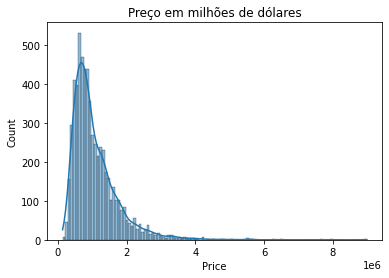

In [26]:
sns.histplot(df['Price'], kde=True).set_title("Preço em milhões de dólares")

<strong>O preço das casas segue aparentemente uma distribuição normal com preço médio de 1.068.828,20 dólares</strong>

In [27]:
df['Price'].mean()

1068828.202065849

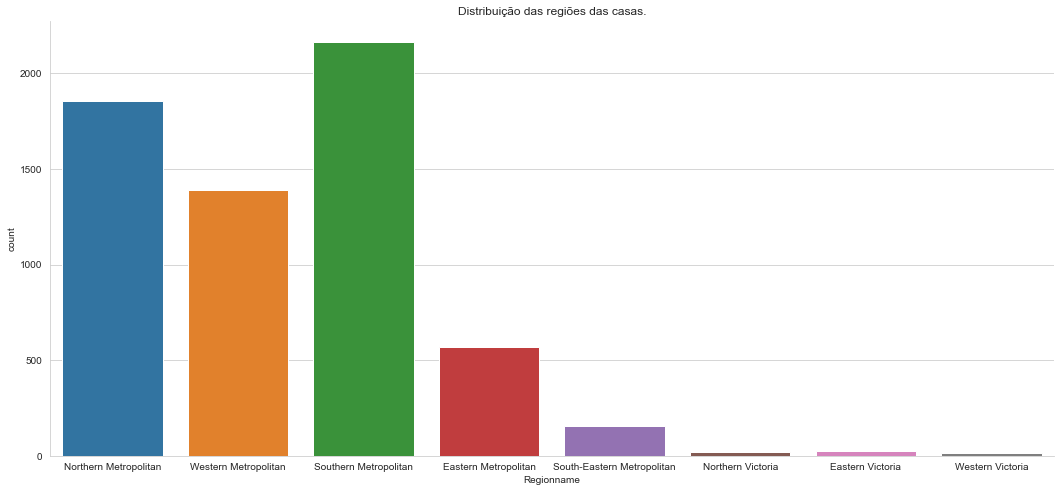

In [28]:
plt.figure(figsize=(18,8))
sns.set_style('whitegrid')
sns.countplot(x='Regionname', data=df).set_title("Distribuição das regiões das casas.")
sns.despine() #tira as bordas da esquerda e de cima

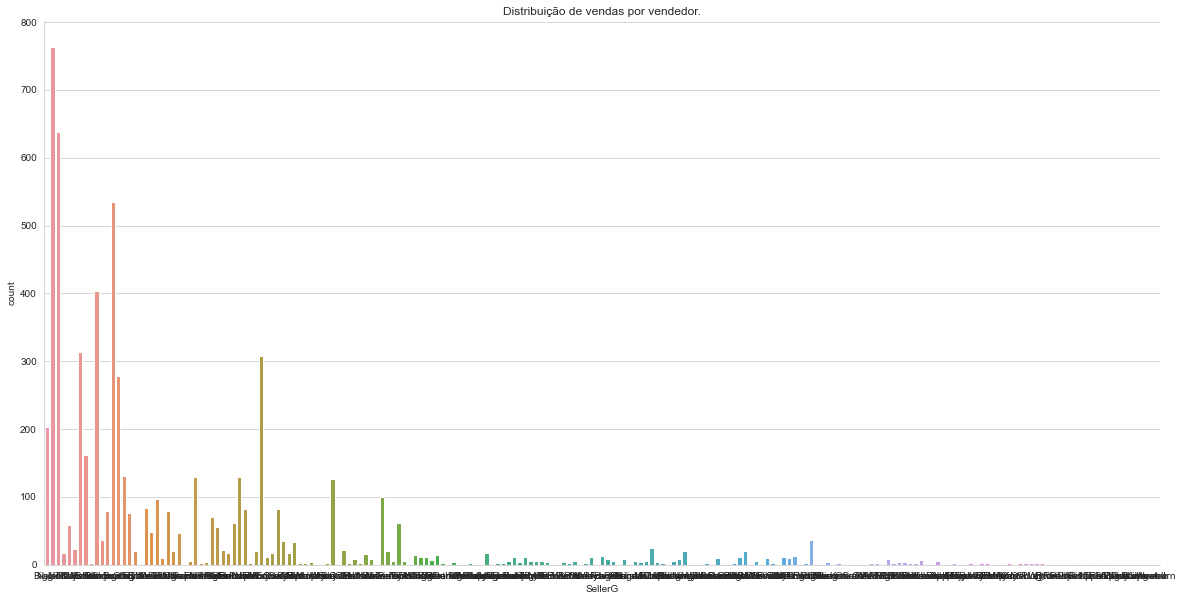

In [29]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.countplot(x='SellerG', data=df).set_title("Distribuição de vendas por vendedor.")
sns.despine() #tira as bordas da esquerda e de cima|

<h3>Devido a baixa qualidade do gráfico propiciada pela elevada quantidade de corretores de imóveis que realizaram vendas, criarei um novo gráfico que expõe apenas os vendedores acima da média.</h3>

In [30]:
print(df['SellerG'].value_counts().mean())
x = df['SellerG'].value_counts().head(32).to_frame()
#x
#Arrumar essa tabela tornando os nomes como index de uma coluna

#plt.figure(figsize=(20,10))
#sns.set_style('whitegrid')
#sns.countplot(x='SellerG', data=x).set_title("Distribuição de vendas por vendedor.")
#sns.despine() #tira as bordas da esquerda e de cima

30.52216748768473


In [31]:
#inserir aqui o gráfico com os vendedores acima da média

Text(0.5, 1.0, 'Boxplot - Preço em milhões de dólares.')

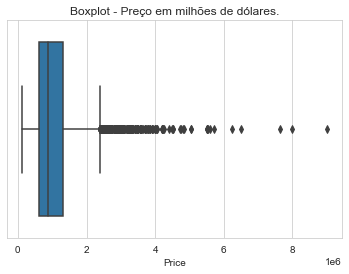

In [32]:
sns.boxplot(x='Price', data=df).set_title("Boxplot - Preço em milhões de dólares.")

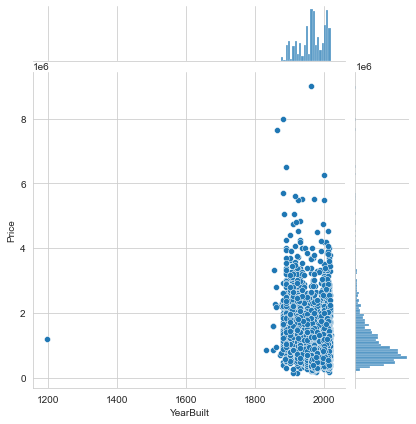

In [33]:
sns.jointplot(x='YearBuilt', y='Price', data=df)

<h3>Existe uma casa de foi construída em 1196, nesta época a Austrália era apenas populada por aborígenes. Apenas em 1770 James Cook reinvindicou o terrítório ao Império Britânico, o qual ficou até 1901. Possívelmente este dado é um resíduo e deve ser eliminado.</h3>

In [34]:
df[df['YearBuilt'] == 1196.0]

Suburb         Address  Rooms Type      Price Method  SellerG  \
9968  Mount Waverley  5 Armstrong St      3    h  1200000.0     VB  McGrath   

            Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
9968  24/06/2017      14.2    3149.0  ...       1.0  4.0     807.0   

      BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude  \
9968         117.0     1196.0       Monash -37.86788   145.12121   

                Regionname Propertycount  
9968  Eastern Metropolitan       13366.0  

[1 rows x 21 columns]

In [35]:
import plotly.express as px
fig = px.density_mapbox(df[df['YearBuilt'] == 1196.0], lat='Lattitude', lon='Longtitude', z='Price', radius=10, center=dict(lat=-37.87, lon=145.1), zoom=11, mapbox_style="stamen-terrain", opacity = 0.5, title = 'Melbourne House 1196')
fig.show()

<h3>O registro não contém valores absurdos além do ano de 1196, tenho duas opções:</h3>
<ul>
    <li>Eliminar o registro</li>
    <li>Inserir a média dos anos no lugar do ano de 1196</li>
</ul>
<h3>Como a base de dados contém muitos registros creio que a exclusão deste dado não trará muitos problemas.</h3>

<Figure size 864x576 with 0 Axes>

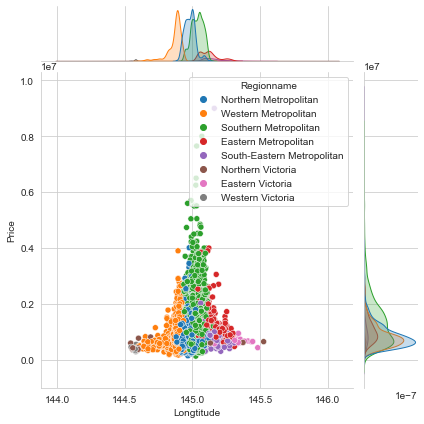

In [36]:
plt.figure(figsize=(12,8))
sns.jointplot(x='Longtitude', y='Price', data=df, hue='Regionname')

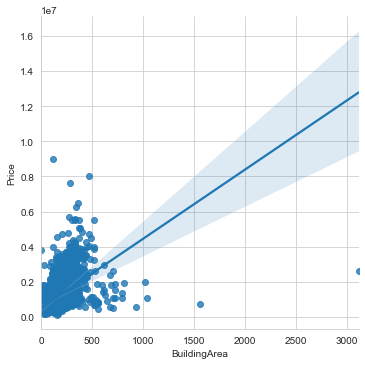

In [110]:
sns.lmplot(x='BuildingArea', y='Price', data=df)

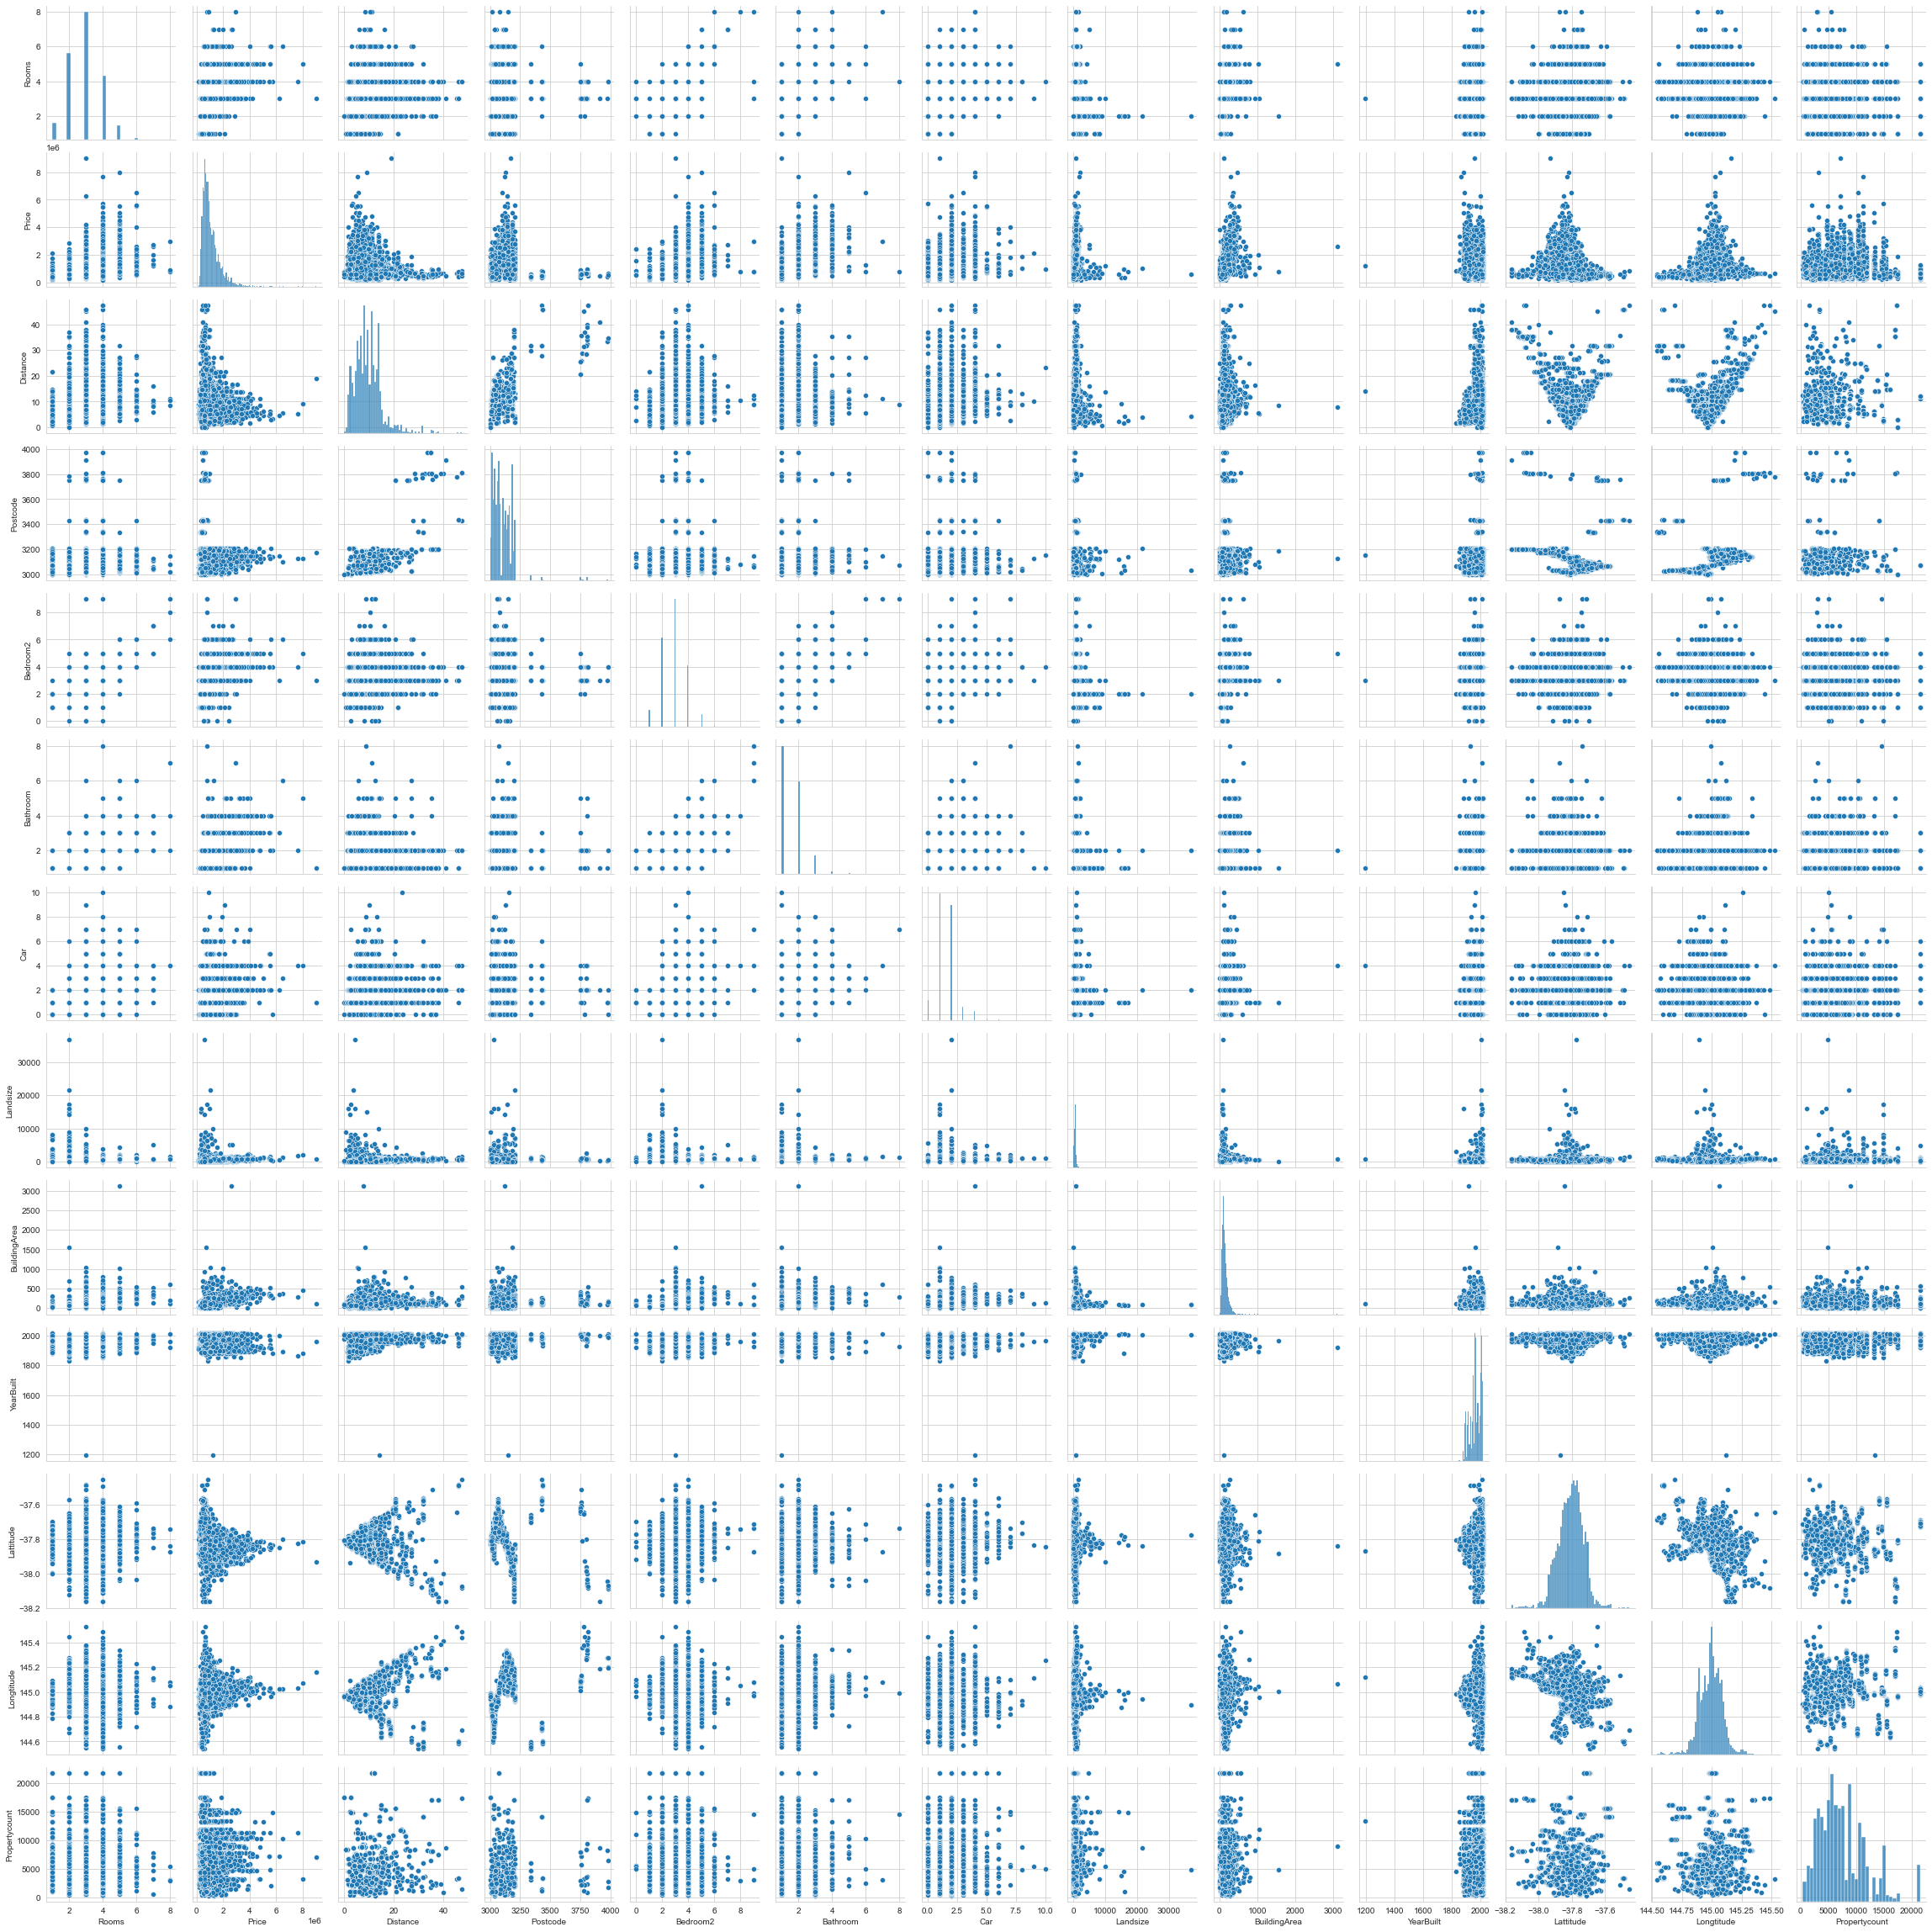

In [149]:
sns.pairplot(df)

<h1>Vamos passar agora para a parte de predição dos preços das casas</h1>
<p>Inicialmente será utilizado Regressão Linear para criar o modelo de predição do preço das casas.</p>

In [38]:
y = df['Price'] #Series contendo apenas os preços

In [55]:
X = df[['Rooms', 'Distance','Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea','Propertycount']] #DataFrame contendo apenas variáveis utilizadas para predição

In [56]:
y

1        1035000.0
2        1465000.0
4        1600000.0
6        1876000.0
7        1636000.0
           ...    
12205     601000.0
12206    1050000.0
12207     385000.0
12209     560000.0
12212    2450000.0
Name: Price, Length: 6196, dtype: float64

In [57]:
X

Rooms  Distance  Bedroom2  Bathroom  Car  Landsize  BuildingArea  \
1          2       2.5       2.0       1.0  0.0     156.0         79.00   
2          3       2.5       3.0       2.0  0.0     134.0        150.00   
4          4       2.5       3.0       1.0  2.0     120.0        142.00   
6          3       2.5       4.0       2.0  0.0     245.0        210.00   
7          2       2.5       2.0       1.0  2.0     256.0        107.00   
...      ...       ...       ...       ...  ...       ...           ...   
12205      3      35.5       3.0       2.0  1.0     972.0        149.00   
12206      3       6.8       3.0       1.0  0.0     179.0        115.00   
12207      1       6.8       1.0       1.0  1.0       0.0         35.64   
12209      2       4.6       2.0       1.0  1.0       0.0         61.60   
12212      6       6.3       6.0       3.0  2.0    1087.0        388.50   

       Propertycount  
1             4019.0  
2             4019.0  
4             4019.0  
6             4019.0  
7             4019.0  
...              ...  
12205         2170.0  
12206         6380.0  
12207         6380.0  
12209         4380.0  
12212         6543.0  

[6196 rows x 8 columns]

In [58]:
from sklearn.model_selection import train_test_split #importando o método utilizado para separar em modelo de treino e teste

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=101)

In [60]:
from sklearn.linear_model import LinearRegression #importando o modelo de Regressão Linear

In [61]:
lm = LinearRegression() #instânciando o modelo de regressão linear

In [62]:
lm.fit(X_train, y_train)

LinearRegression()

In [63]:
lm.coef_

array([ 2.12908044e+05, -3.94899052e+04,  1.75903348e+04,  1.63368714e+05,
        3.69005438e+04,  1.94130112e+01,  2.07296185e+03, -1.29812525e+00])

## Previsão de dados de teste
Vamos avaliar o seu desempenho ao prever os valores de teste!

In [64]:
prediction = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

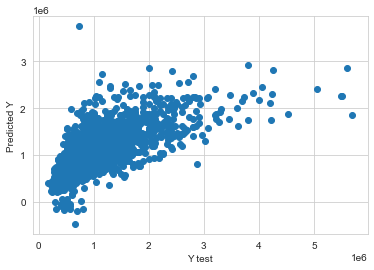

In [65]:
plt.scatter(y_test, prediction)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

## Avaliando o Modelo

Vamos avaliar o desempenho do nosso modelo calculando a soma residual dos quadrados e o escore de variância explicado (R ^ 2).

In [66]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 323601.9418064192
MSE: 217479391156.45526
RMSE: 466346.8571315296


## Resíduos

Vamos explorar rapidamente os resíduos para garantir que tudo esteja bem com os nossos dados.

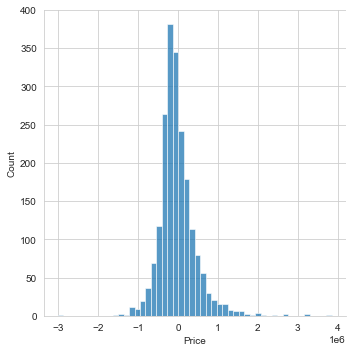

In [67]:
sns.displot((y_test-prediction), bins=50)

<p>Nota-se que houve uma boa concentração em valores muito próximos a zero, o que é bom para o modelo.</p>

In [68]:
coef = pd.DataFrame(lm.coef_, X.columns, columns=['Coefs'])
coef

Coefs
Rooms          212908.044470
Distance       -39489.905229
Bedroom2        17590.334761
Bathroom       163368.714397
Car             36900.543761
Landsize           19.413011
BuildingArea     2072.961850
Propertycount      -1.298125

## Como interpretar tais dados:
Para cada aumento de uma unidade, haverá um acrescimo do coeficiênte no valor total predito da casa.

Exemplo: Para cada quarto que a casa tem o preço final cresce 155.358,19 dólares.
Percebe-se que o aumento da distância (Distance) diminui o valor predito pela casa, esta distância diz respeito a distância da casa em relação ao centro da cidade. Outra variável que poderiamos de premissa avaliar como negativa para o preço da casa, a variável YeraBuilt que diz respeito ao ano que a casa foi construída, mostra que de fato quanto mais o tempo passa mais a casa se desvaloriza, para cada ano a mais que a casa possui em relação ao ano de construção o preço final descresce em -5510,04 dólares.

In [69]:
X.loc[25]

Rooms               2.0
Distance            2.5
Bedroom2            2.0
Bathroom            1.0
Car                 0.0
Landsize          147.0
BuildingArea       85.0
Propertycount    4019.0
Name: 25, dtype: float64

In [70]:
y.loc[25]

1315000.0

In [71]:
coef

Coefs
Rooms          212908.044470
Distance       -39489.905229
Bedroom2        17590.334761
Bathroom       163368.714397
Car             36900.543761
Landsize           19.413011
BuildingArea     2072.961850
Propertycount      -1.298125

<h3>Exemplo do cálculo do preço da casa de número 25:</h3>
<p><strong>Rooms 3:</strong> 3 * 212.908 = 638.724 dólares</p>
<p><strong>Distance 3.3:</strong> 3.3 * 39.489 =  -130.313 dólares</p>
<p><strong>Bedroom2 3:</strong> 3 * 17.590 = 52.770 dólares</p>
<p><strong>Bathroom 2:</strong> 2 * 163.368 = 326.736 dólares</p>
<p><strong>Car 1:</strong> 1 * 36.900 = 36.900 dólares</p>
<p><strong>Landsize 211:</strong> 211 * 19.41 = 4095 dólares</p>
<p><strong>BuildingArea 147:</strong> 147 * 2073 = 304.731 dólares</p>
<p><strong>PropertyCount:</strong> 3280 * -1.3 = -4264 dólares</p>
<p><strong>Preço estimado:</strong> 1.229.379 Dólares</p>


<h3>Preço estimado X Preço real</h3>
<p>Preço estimado: 1.229.379 dólares</p>
<p>Preço real: 1.315.000</p>